In [22]:
import random
import torch
from torch import nn, optim
import math
from IPython import display
import time

In [4]:
from matplotlib import pyplot as plt

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [5]:
seed = 42
random.seed(seed)
torch.manual_seed(seed)

N = 1000  # num of samples per class
D = 1  # dimensions
C = 1  # num classes
H = 100  # num of hidden units

In [6]:
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = X.pow(3) + 0.3 * torch.rand(X.size()).to(device)

In [7]:
print('Shapes:')
print('X: ', tuple(X.size()))
print('y: ', tuple(y.size()))

Shapes:
X:  (100, 1)
y:  (100, 1)


(-1.1, 1.1, -0.8630147278308868, 1.2105821669101715)

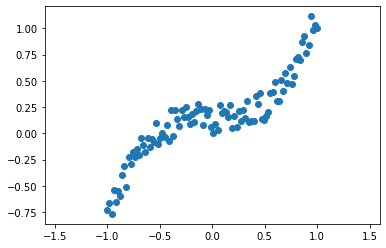

In [9]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy())
plt.axis('equal')

## Two-Layered Neural Network

In [20]:
lr = 3e-2  # learning rate
lambda_l2 = 1e-3  # L2 weight decay

In [23]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

# Use mean squared error for regression task.
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=lambda_l2)

y_pretrain = None

# Train for 100 epochs.
for t in range(100):
  y_pred = model(X)
  if t == 0:
    y_pretrain = y_pred.detach()
  loss = criterion(y_pred, y)
  print(f'[EPOCH]: {t}, [LOSS]: {loss.item():.3f}')
  display.clear_output(wait=True)
  # zero the gradients before running the backward pass.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  time.sleep(0.1)

[EPOCH]: 99, [LOSS]: 0.007


In [24]:
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)
